# Machine Learning with Tree-Based Models in Python

## Classification and Regression Trees

### Train your first classification tree


In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [1]:
import pandas as pd
df_wbc = pd.read_csv(r'.\data\wbc.csv')
df_wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
X = df_wbc[['radius_mean', 'concave points_mean']]
y = pd.Series([0 if _=='B' else 1 for _ in df_wbc[['diagnosis']].values])

In [3]:
import sklearn.tree as sktr
import sklearn.model_selection as skms
import sklearn.metrics as skme

X_train, X_test, y_train, y_test = skms.train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=1
)

In [4]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dtc = sktr.DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dtc.fit(X_train, y_train)

# Predict test set labels
y_pred = dtc.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


### Evaluate the classification tree

In [5]:
# Compute test set accuracy  
acc = skme.accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Logistic regression vs classification tree


A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

In [6]:
def plot_decision_regions(  X, y, clf,
                            feature_index=None,
                            filler_feature_values=None,
                            filler_feature_ranges=None,
                            ax=None,
                            X_highlight=None,
                            zoom_factor=1.,
                            legend=1,
                            hide_spines=True,
                            markers=\'s^oxv<>\',
                            colors=(\'#1f77b4,#ff7f0e,#3ca02c,#d62728,\'
                                    \'#9467bd,#8c564b,#e377c2,\'
                                    \'#7f7f7f,#bcbd22,#17becf\'),
                            scatter_kwargs=None,
                            contourf_kwargs=None,
                            scatter_highlight_kwargs=None):
    """ Plot decision regions of a classifier.
    
        Please note that this functions assumes that class labels are
        labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
        labels with integer labels > 4, you may want to provide additional colors
        and/or markers as `colors` and `markers` arguments.
        See http://matplotlib.org/examples/color/named_colors.html for more information.
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
        
        y : array-like, shape = [n_samples]
        True class labels.
        
        clf : Classifier object.
        Must have a .predict method.
        
        feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.\n\n    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
        
        filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
        
        ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
        
        X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
        
        zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.
        
        hide_spines : bool (default: True)
        Hide axis spines if True.
        
        legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
        
        markers : str (default: \'s^oxv<>\')
        Scatterplot markers.
        
        colors : str (default: \'red,blue,limegreen,gray,cyan\')
        Comma separated list of colors.
        
        scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
        
        contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.
        
        scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
        
        Returns
        ---------
        ax : matplotlib.axes.Axes object
        
        Examples
        -----------
        For usage examples, please see
        http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
    """
        check_Xy(X, y, y_int=True)  # Validate X and y arrays
        dim = X.shape[1]
        
        if ax is None:
            ax = plt.gca()
            plot_testdata = True
            if not isinstance(X_highlight, np.ndarray):
                if X_highlight is not None:
                    raise ValueError(\'X_highlight must be a NumPy array or None\')
                else:
                    plot_testdata = False
            elif len(X_highlight.shape) < 2:
                raise ValueError(\'X_highlight must be a 2D array\')
            if feature_index is not None:
                # Unpack and validate the feature_index values
                if dim == 1:
                    raise ValueError('feature_index requires more than one training feature\')
                    try:
                        x_index, y_index = feature_index
                    except ValueError:
                        raise ValueError('Unable to unpack feature_index. Make sure feature_index only has two dimensions.\')
                    try:
                        X[:, x_index], X[:, y_index]
                    except IndexError:
                        raise IndexError('feature_index values out of range. X.shape is {}, but feature_index is {}\'.format(X.shape, feature_index))
                else:
                    feature_index = (0, 1)
                    x_index, y_index = feature_index # Extra input validation for higher number of training features
                if dim > 2:
                    if filler_feature_values is None:
                        raise ValueError('Filler values must be provided when X has more than 2 training features.')
                    if filler_feature_ranges is not None:
                        if not set(filler_feature_values) == set(filler_feature_ranges):
                            raise ValueError('filler_feature_values and filler_feature_ranges must have the same keys')
                            
                    # Check that all columns in X are accounted for
                    column_check = np.zeros(dim, dtype=bool)
                    for idx in filler_feature_values:
                        column_check[idx] = True
                        for idx in feature_index:
                            column_check[idx] = True
                            if not all(column_check):
                                missing_cols = np.argwhere(~column_check).flatten()
                                raise ValueError('Column(s) {} need to be accounted for in either feature_index or filler_feature_values'.format(missing_cols))
                    marker_gen = cycle(list(markers))
                    n_classes = np.unique(y).shape[0]
                    colors = colors.split(\',\')
                    colors_gen = cycle(colors)
                    colors = [next(colors_gen for c in range(n_classes)]
                    # Get minimum and maximum 
                    x_min, x_max = (X[:, x_index].min() - 1./zoom_factor,
                                    X[:, x_index].max() + 1./zoom_factor)
                    if dim == 1:
                        y_min, y_max = -1, 1
                    else:
                        y_min, y_max = (X[:, y_index].min() - 1./zoom_factor,
                                        X[:, y_index].max() + 1./zoom_factor)
                                        
                    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
                    xnum, ynum = floor(xnum), ceil(ynum)
                    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=xnum),
                    np.linspace(y_min, y_max, num=ynum))
                    
                    if dim == 1:
                        X_predict = np.array([xx.ravel()]).T
                    else:
                        X_grid = np.array([xx.ravel(), yy.ravel()]).T
                        X_predict = np.zeros((X_grid.shape[0], dim))
                        X_predict[:, x_index] = X_grid[:, 0]
                        X_predict[:, y_index] = X_grid[:, 1]
                    if dim > 2:
                        for feature_idx in filler_feature_values:
                            X_predict[:, feature_idx] = filler_feature_values[feature_idx]
                            Z = clf.predict(X_predict.astype(X.dtype))
                            Z = Z.reshape(xx.shape)
                            # Plot decisoin region
                            # Make sure contourf_kwargs has backwards compatible defaults
                            contourf_kwargs_default = {\'alpha\': 0.45, \'antialiased\': True}
                            contourf_kwargs = format_kwarg_dictionaries(
                                default_kwargs=contourf_kwargs_default,
                                user_kwargs=contourf_kwargs,
                                protected_keys=[\'colors\', \'levels\'])
                            cset = ax.contourf( xx, yy, Z,
                                                colors=colors,
                                                levels=np.arange(Z.max() + 2) - 0.5,
                                                **contourf_kwargs)
                            ax.contour( xx, yy, Z, cset.levels,
                                        colors='k\',
                                        linewidths=0.5,
                                        antialiased=True)
                            ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])
                            # Scatter training data samples
                            # Make sure scatter_kwargs has backwards compatible defaults
                            scatter_kwargs_default = {\'alpha\': 0.8, \'edgecolor\': \'black\'}
                            scatter_kwargs = format_kwarg_dictionaries(
                                    default_kwargs=scatter_kwargs_default,
                                    user_kwargs=scatter_kwargs,
                                    protected_keys=[\'c\', \'marker\', \'label\'])
                            for idx, c in enumerate(np.unique(y)):\n        if dim == 1:\n            y_data = [0 for i in X[y == c]]\n            x_data = X[y == c]\n        elif dim == 2:\n            y_data = X[y == c, y_index]\n            x_data = X[y == c, x_index]\n        elif dim > 2 and filler_feature_ranges is not None:\n            class_mask = y == c\n            feature_range_mask = get_feature_range_mask(\n                            X, filler_feature_values=filler_feature_values,\n                            filler_feature_ranges=filler_feature_ranges)\n            y_data = X[class_mask & feature_range_mask, y_index]\n            x_data = X[class_mask & feature_range_mask, x_index]\n        else:\n            continue\n\n        ax.scatter(x=x_data,\n                   y=y_data,\n                   c=colors[idx],\n                   marker=next(marker_gen),\n                   label=c,\n                   **scatter_kwargs)\n\n    if hide_spines:\n        ax.spines[\'right\'].set_visible(False)\n        ax.spines[\'top\'].set_visible(False)\n        ax.spines[\'left\'].set_visible(False)\n        ax.spines[\'bottom\'].set_visible(False)\n    ax.yaxis.set_ticks_position(\'left\')\n    ax.xaxis.set_ticks_position(\'bottom\')\n    if dim == 1:\n        ax.axes.get_yaxis().set_ticks([])\n\n    if plot_testdata:\n        if dim == 1:\n            x_data = X_highlight\n            y_data = [0 for i in X_highlight]\n        elif dim == 2:\n            x_data = X_highlight[:, x_index]\n            y_data = X_highlight[:, y_index]\n        else:\n            feature_range_mask = get_feature_range_mask(\n                    X_highlight, filler_feature_values=filler_feature_values,\n                    filler_feature_ranges=filler_feature_ranges)\n            y_data = X_highlight[feature_range_mask, y_index]\n            x_data = X_highlight[feature_range_mask, x_index]\n\n        # Make sure scatter_highlight_kwargs backwards compatible defaults\n        scatter_highlight_defaults = {\'c\': \'none\',\n                                      \'edgecolor\': \'black\',\n                                      \'alpha\': 1.0,\n                                      \'linewidths\': 1,\n                                      \'marker\': \'o\',\n                                      \'s\': 80}\n        scatter_highlight_kwargs = format_kwarg_dictionaries(\n                                    default_kwargs=scatter_highlight_defaults,\n                                    user_kwargs=scatter_highlight_kwargs)\n        ax.scatter(x_data,\n                   y_data,\n                   **scatter_highlight_kwargs)\n\n    if legend:\n        if dim > 2 and filler_feature_ranges is None:\n            pass\n        else:\n            handles, labels = ax.get_legend_handles_labels()\n            ax.legend(handles, labels,\n                      framealpha=0.3, scatterpoints=1, loc=legend)\n\n    return ax\n'

def plot_labeled_decision_regions(X,y, models):
    ''' Function producing a scatter plot of the instances contained
        in the 2D dataset (X,y) along with the decision
        regions of two trained classification models contained in the
        list 'models'.
        
        Parameters
        ----------
        X: pandas DataFrame corresponding to two numerical features
        y: pandas Series corresponding the class labels
        models: list containing two trained classifiers
    '''
    if len(models) != 2:
        raise Exception('''\n        Models should be a list containing only two trained classifiers.\n        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''\n        X has to be a pandas DataFrame with two numerical features.\n        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''\n        y has to be a pandas Series corresponding to the labels.\n        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

SyntaxError: unexpected character after line continuation character (1326040239.py, line 10)

NameError: name 'plot_decision_regions' is not defined

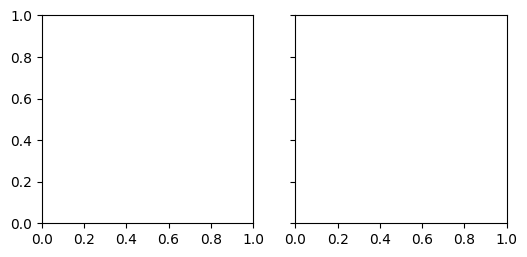

In [ ]:
# Import LogisticRegression from sklearn.linear_model
import sklearn.linear_model as sklm #import  LogisticRegression
import matplotlib.pyplot as plt

# Instatiate logreg
logreg = sklm.LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dtc]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

### Classification tree Learning

In [ ]:
df_wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_wbc['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
import sklearn.tree as sktr #import DecisionTreeClassifier

# Import train_test_split
import sklearn.model_selection as skms #import train_test_split

# Import accuracy_score
import sklearn.metrics as skme # import accuracy_score

In [ ]:
X = df_wbc[[
  'radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'perimeter_se',
  'area_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'
]]

y = [1 if _=='M' else '0' for _ in df_wbc['diagnosis']]

# Split dataset into 80% train, 20%
testX_train, X_test, y_train, y_test= skms.train_test_split(
  X, y,
  test_size=0.2,
  stratify=y,
  random_state=1)

In [ ]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = sktr.DecisionTreeClassifier(
    max_depth=8,
    criterion='entropy',
    random_state=1
)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
# y_pred = dt_entropy.predict(X_test)
# accuracy_entropy = skme.accuracy_score(y_test, y_pred)
# accuracy_entropy

### Decision tree for regression

## The Bias-Variance Tradeoff

### Generalization Error

### Diagnose bias and variance problems

In [ ]:
a

# Extras

In [1]:
import pandas as pd

In [5]:
path = r'C:\Users\anshu\OneDrive\Teaching Opportunities\Excel\Challenges\Excel_Challenge_504 - US Presidents All First Chars Same.xlsx'

In [9]:
df = pd.read_excel(path, sheet_name='Sheet1', usecols='A')

In [10]:
df.head()

,US Presidents
0,George Washington
1,John Adams
2,Thomas Jefferson
3,James Madison
4,James Monroe


In [42]:
df = pd.DataFrame(
    {
        'US Presidents': ['George Geoff', 'Tim Terry', 'Ron Berry', 'John Jerry Terry']
    }
)

In [43]:
def get_initial(name):
    parts = name.lower().split()
    if len(parts) > 1:
        first_char = parts[0][0]
        initials = ''.join([part[0] for part in parts[1:]])
    #     return first_char in initials
    # return False
    return (parts, first_char, (initials), first_char in initials)

In [45]:
for _ in range(len(df)):
    print(get_initial(df.iloc[_,0])) #.str.lower().values[0].split())

(['george', 'geoff'], 'g', 'g', True)
(['tim', 'terry'], 't', 't', True)
(['ron', 'berry'], 'r', 'b', False)
(['john', 'jerry', 'terry'], 'j', 'jt', True)


In [ ]:
def has_matching_initial(name):
    parts = name.lower().split()
    if len(parts) > 1:
        first_char = parts[0][0]
        initials = ''.join([part[0] for part in parts[1:]])
        return first_char in initials
    return False

# df = xl("A1:A47", headers=True)
df['matching'] = df['US Presidents'].apply(has_matching_initial)
df[df['matching']]['US Presidents'].values

In [59]:
import pandas as pd

# Sample DataFrame
data = {'names': ['Alice B.', 'Attr Atub Art', 'Bob B. Charlie', 'Charlie C. Chor', 'David D. Door', 'Eve E. First', 'Frank F.']}
df = pd.DataFrame(data)

def has_matching_initial(name):
    parts = name.lower().split()
    if len(parts) > 1:
        # first_char = parts[0][0]
        initials = ''.join([part[0] for part in parts])
        # return initials.count(first_char)==len(initials)
        # print (f'First Char {initials[0]}, Length of initials {initials}, {initials.count(initials[0])==len(initials)}')
        return initials.count(initials[0])==len(initials)
    return False

# Apply the function to the DataFrame
df['matching_initial'] = df['names'].apply(has_matching_initial)

# Filter the DataFrame to get names with matching initials
matching_names = df[df['matching_initial']]#['names'].values

print(matching_names)


             names  matching_initial
1    Attr Atub Art              True
3  Charlie C. Chor              True
4    David D. Door              True
6         Frank F.              True


In [60]:
import pandas as pd

# Sample DataFrame
data = {'names': ['Alice B.', 'Attr Atub Art', 'Bob B. Charlie', 'Charlie C. Chor', 'David D. Door', 'Eve E. First', 'Frank F.']}
df = pd.DataFrame(data)

def has_matching_initial(name):
    parts = name.lower().split()
    if len(parts) > 1:
        initials = ''.join([part[0] for part in parts])
        return initials.count(initials[0])==len(initials)
    return False

df['matching_initial'] = df['names'].apply(has_matching_initial)
matching_names = df[df['matching_initial']]#['names'].values
print(matching_names.to_markdown())

|    | names           | matching_initial   |
|---:|:----------------|:-------------------|
|  1 | Attr Atub Art   | True               |
|  3 | Charlie C. Chor | True               |
|  4 | David D. Door   | True               |
|  6 | Frank F.        | True               |


In [61]:
import string
import re
chars_ = string.ascii_uppercase
start_ = 0
line_ = ''
lst_ = []
for _ in range(8):
  line_ = f"{(' '.join(chars_[start_:start_+_])):^11}"
  if line_.split():
    lst_.append(re.split('( )', line_))#.split((' ')))
  start_ += _